In [10]:
from osgeo import gdal
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

(299, 186, 3)
max:  1.0291022
min: 0.0


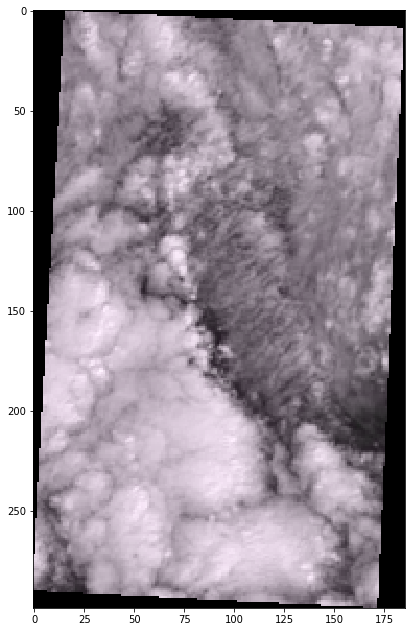

In [16]:
# gtif = gdal.Open("MCI_0_2018-06-01/dbe06822e4728a39578506dd3e5b04f1.Oa11_radiance.tif")
gtif1 = gdal.Open("exports/test_pieter/RGB/RGB_2018-06-13/ea6dd33dd66174c62ab5c4c39b797414.Oa04_radiance.tif")
gtif2 = gdal.Open("exports/test_pieter/RGB/RGB_2018-06-13/ea6dd33dd66174c62ab5c4c39b797414.Oa06_radiance.tif")
gtif3 = gdal.Open("exports/test_pieter/RGB/RGB_2018-06-13/ea6dd33dd66174c62ab5c4c39b797414.Oa04_radiance.tif")
image1 = gtif1.ReadAsArray()
image2 = gtif2.ReadAsArray()
image3 = gtif3.ReadAsArray()

image = np.stack((image1, image2, image3), axis=-1) / 6 # scale data between 0 & 1, Sentinel3 specific scale

print(image.shape)
print("max: ", np.max(image))
print("min:", np.min(image))
image[image > 6] = np.max(image)
image[image > 1] = 1 # clip rounding errors
f, axs = plt.subplots(figsize=(20,11))
plt.imshow(image)
plt.show()

In [17]:
gtif1 = gdal.Open("exports/RGB/RGB_2018-06-13/a47c55ae17ad8a5477111efc9ad3c60d.Oa11_radiance.tif")
image1 = gtif1.ReadAsArray()

AttributeError: 'NoneType' object has no attribute 'ReadAsArray'

In [24]:
files = glob.glob("/geo_info/02_Werkplaatsen/UITWISSELEN/JonathanG/ijsselmeer_MCI_tiff_exports/2018-06/mci/*")
# files = glob.glob("/home/jgerbscheid/repositories/GEE-queries/exports/test_pieter/MCI/MCI_2018-06-30/*.tif")
# files = glob.glob("/geo_info/02_Werkplaatsen/UITWISSELEN/JonathanG/ijsselmeer_MCI_tiff_exports/2018-06/rgb/*")

/data/anaconda3/envs/gee/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


MCI_18_2018-06-16.tif


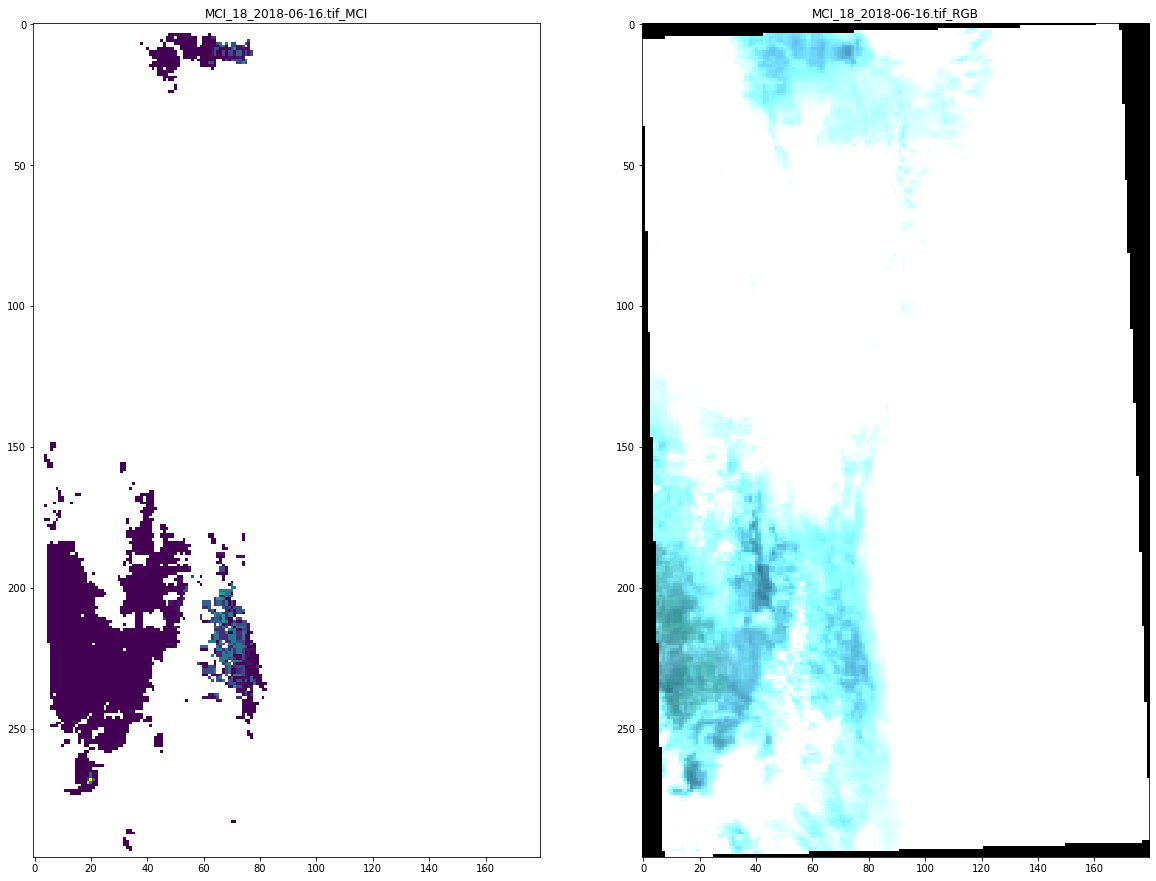

In [25]:
idx = 16
gtif = gdal.Open(files[idx])
# gtif_rgb = gdal.Open("/geo_info/02_Werkplaatsen/UITWISSELEN/JonathanG/ijsselmeer_MCI_tiff_exports/2018-06/rgb/{}".format("RGB" + os.path.basename(files[idx])[3:]))
# gtif = gdal.Open("/geo_info/02_Werkplaatsen/UITWISSELEN/JonathanG/ijsselmeer_MCI_tiff_exports/MCI_22_2018-01-21.tif")
# gtif = gdal.Open("/geo_info/02_Werkplaatsen/UITWISSELEN/JonathanG/ijsselmeer_MCI_tiff_exports/MCI_22_2018-01-21.tif")
# gtif = gdal.Open("/geo_info/02_Werkplaatsen/UITWISSELEN/JonathanG/ijsselmeer_MCI_tiff_exports/old/ijssel_MCI_nocloud.tif")
image = gtif.ReadAsArray()
# image_RGB = gtif_rgb.ReadAsArray()
# print(image_RGB.shape)
# image_RGB = np.rollaxis(image_RGB, 0, 3)  
# print(image.shape)
# print(image_RGB.shape)

print(os.path.basename(files[idx]))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))
ax1.set_title(os.path.basename(files[idx]) + "_MCI")
ax2.set_title(os.path.basename(files[idx]) + "_RGB")
image[image < 0] = 0
# image_RGB[image_RGB < 0] = 0.0
# image_RGB[image_RGB > 255] = 255.0
# image[image == np.nan] = 3
# print(image)
ax1.imshow(image)
ax2.imshow(image_RGB)
plt.show()